In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Load the dataset
data = pd.read_csv('Salary Data.csv')
data
print(data.shape)


(40, 2)


In [20]:
data

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [4]:
# Display basic information
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes
None


In [5]:
# Display summary statistics
print(data.describe())



       Experience Years         Salary
count         40.000000      40.000000
mean           5.152500   74743.625000
std            2.663715   25947.122885
min            1.100000   37731.000000
25%            3.200000   56878.250000
50%            4.600000   64472.500000
75%            6.875000   95023.250000
max           10.500000  122391.000000


In [6]:
# Check for missing values
print(data.isnull().sum())



Experience Years    0
Salary              0
dtype: int64


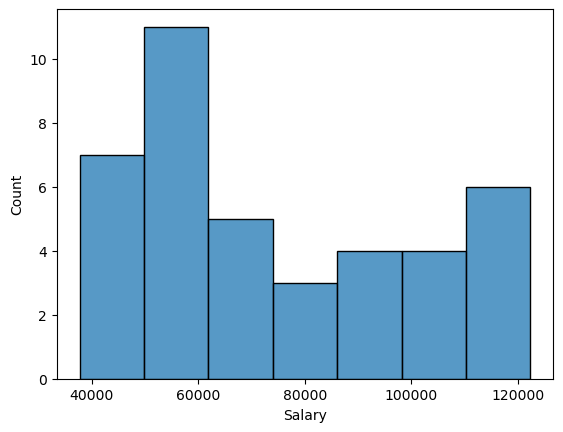

In [16]:
# Visualize distributions
sns.histplot(data['Salary'])
plt.show()

In [17]:
data['Salary'].mean()



64472.5

In [18]:
data['Salary'].median()



64472.5

In [16]:

data['Salary'].mode()

0      37731
1      39343
2      39891
3      42774
4      43525
5      46205
6      48266
7      54445
8      55794
9      56642
10     56957
11     57081
12     57189
13     59095
14     60000
15     60150
16     60200
17     61111
18     63218
19     64445
20     64500
21     66029
22     67938
23     81363
24     82200
25     83088
26     90000
27     91000
28     91738
29     93940
30     98273
31    101302
32    105582
33    109431
34    111620
35    112635
36    113812
37    116969
38    121872
39    122391
Name: Salary, dtype: int64

# Linear regression

In [19]:
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


Text(0.5, 1.0, 'Salary data')

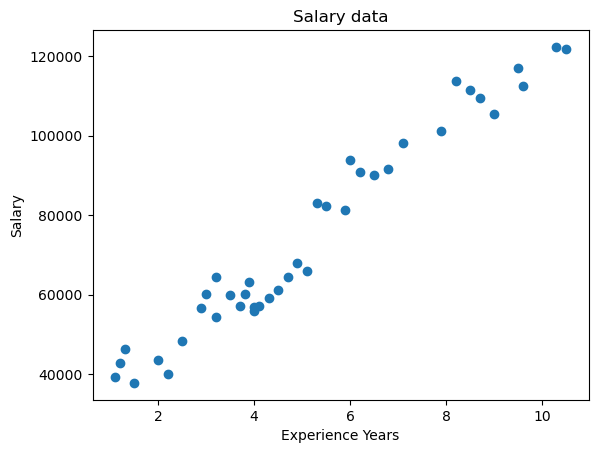

In [25]:
plt.scatter(data['Experience Years'],data['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title("Salary data")

In [26]:
x=data[['Experience Years']]

In [27]:
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [29]:
y=data.drop('Experience Years',axis=1)

In [30]:
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
x.mean()

Experience Years    5.1525
dtype: float64

In [35]:
y.mean()

Salary    74743.625
dtype: float64

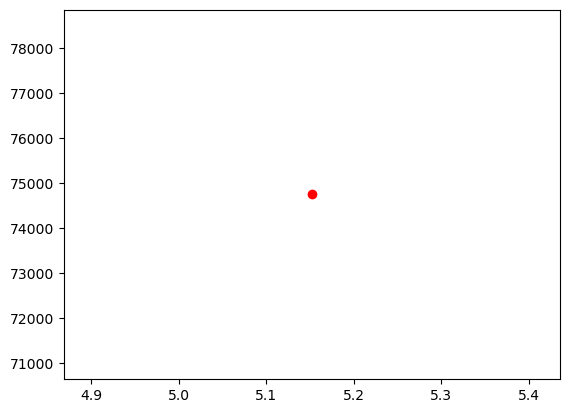

In [36]:
plt.scatter(x.mean(),y.mean(),color='red')

# combination of  two scatterplot

Text(0.5, 1.0, 'Salary data')

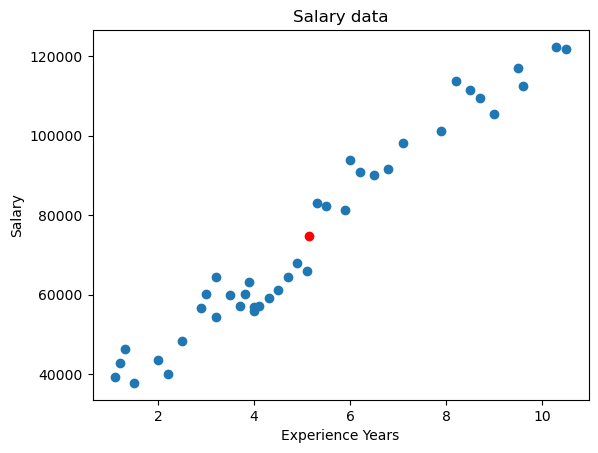

In [37]:
plt.scatter(x.mean(),y.mean(),color='red')

plt.scatter(data['Experience Years'],data['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title("Salary data")

In [49]:
#train the moder
reg.fit(x,y)
 

LinearRegression()

In [44]:
m=reg.coef_
m

array([[9523.65050742]])

In [45]:
c=reg.intercept_
c

array([25673.01576053])

In [47]:
predict_y=m*10.5+c
predict_y

array([[125671.34608842]])

In [50]:
reg.predict([[10.5]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[125671.34608842]])

In [52]:
data['predict_y']=reg.predict(x)

In [53]:
data.head()

,Experience Years,Salary,predict_y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


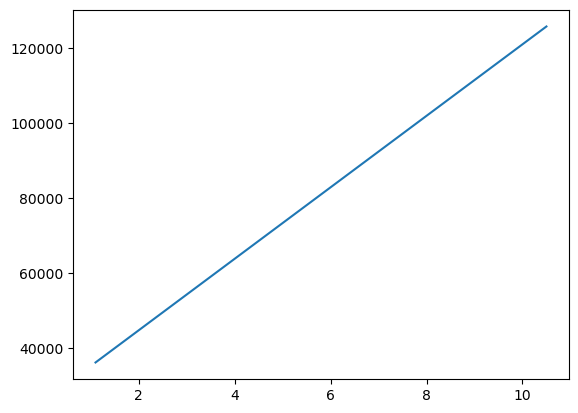

In [54]:
plt.plot(x,reg.predict(x))

Text(0.5, 1.0, 'Salary data')

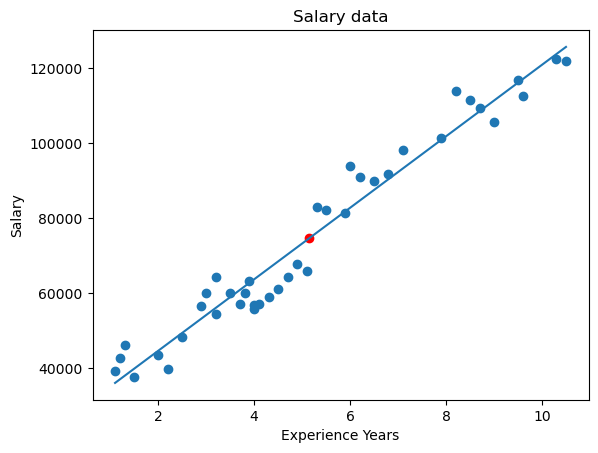

In [55]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')

plt.scatter(data['Experience Years'],data['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title("Salary data")

# Lose and cost

In [59]:
data['lose']=data['Salary']-data['predict_y']
data.head()

,Experience Years,Salary,predict_y,lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [60]:
 #MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
mse= mean_squared_error(data['Salary'],data['predict_y'])
mse

28960383.6537762

In [62]:
mae= mean_absolute_error(data['Salary'],data['predict_y'])
mae

4516.281792544623

In [63]:
reg.score(x,y)

0.9558814451799361

Text(0.5, 1.0, 'Salary data')

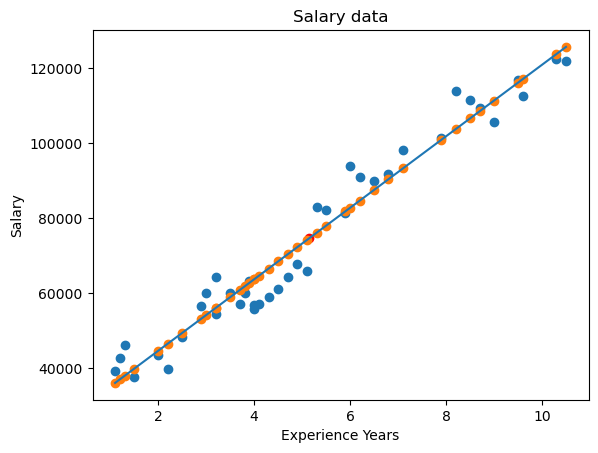

In [64]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')

plt.scatter(data['Experience Years'],data['Salary'])
plt.scatter(data['Experience Years'],reg.predict(x))
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title("Salary data")

In [65]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.9558814451799361